In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, Y_train),(X_test, Y_test)  = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

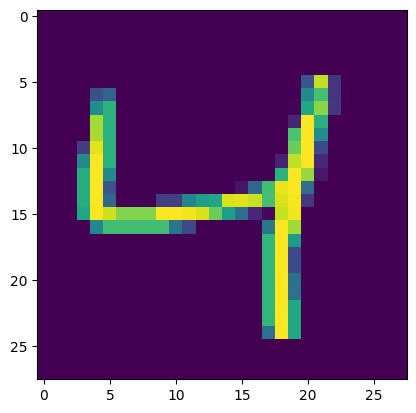

In [5]:
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [10]:
history = model.fit(X_train, Y_train,epochs=30, validation_split = 0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2842 - val_loss: 0.1509
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1170 - val_loss: 0.1166
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0804 - val_loss: 0.1097
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0605 - val_loss: 0.0904
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0478 - val_loss: 0.0934
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0377 - val_loss: 0.0998
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0309 - val_loss: 0.0956
Epoch 8/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0261 - val_loss: 0.1021
Epoch 9/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0201 - val_loss: 0.1093
Epoch 10/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.020

In [11]:
prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [12]:
y_pred = prob.argmax(axis=1)

In [13]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
acc = accuracy_score(Y_test, y_pred)
print("Accuracy: ",acc*100,"%")

Accuracy:  97.56 %


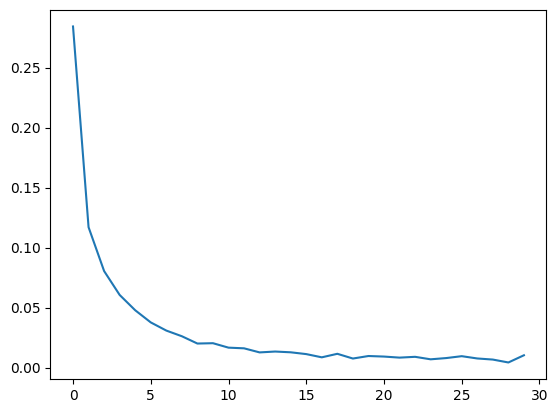

In [16]:
plt.plot(history.history['loss'])